In [11]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [12]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [9]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [20]:
# Base attempt
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n'
    'Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191
Percent Accuracy: 0.7521472392638037


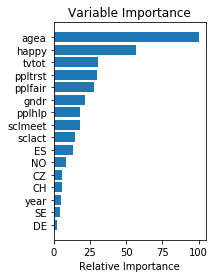

In [16]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [22]:
# Doubling n_estimators, got worse.
params = {'n_estimators': 1000, 'max_depth': 2, 'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.044189852700491
Percent Type II errors: 0.1692580469176214

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18036809815950922
Percent Accuracy: 0.7484662576687117


In [23]:
# Adding max depth makes it overfit way worse.
params = {'n_estimators': 1000, 'max_depth': 4, 'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.011320240043644299
Percent Type II errors: 0.08074195308237861

Test set accuracy:
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.17914110429447852
Percent Accuracy: 0.7165644171779142


In [26]:
# Adding max depth makes it overfit way worse.
params = {'n_estimators': 500, 'max_depth': 1, 'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.046235679214402615
Percent Type II errors: 0.19953627932351337

Test set accuracy:
Percent Type I errors: 0.04785276073619632
Percent Type II errors: 0.20736196319018405
Percent Accuracy: 0.7447852760736197


In [27]:
# Changing the loss function doesn't do much.
params = {'n_estimators': 500, 'max_depth': 2, 'loss': 'exponential'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325
Percent Accuracy: 0.7484662576687117


In [42]:
# Changing the learning rate didn't improve in either direction. Changing the subsample param didn't help.
# Adjusting the max_features to sqrt actually improves test accuracy slightly
params = {'n_estimators': 1000, 'max_depth': 3, 'loss': 'deviance', 'max_features' : 'sqrt', 'subsample' : 0.5}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.03259683578832515
Percent Type II errors: 0.13911620294599017

Test set accuracy:
Percent Type I errors: 0.0834355828220859
Percent Type II errors: 0.17668711656441718
Percent Accuracy: 0.7398773006134969


In [96]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'year'])]
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [112]:
# Best yet? Dropping features is giving same results.
params = {'n_estimators': 400, 'max_depth': 2, 'loss': 'deviance','max_features' : 'sqrt', 'subsample' : .85, 'learning_rate' : .1}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(('Training set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n\n''Test set accuracy:\n''Percent Type I errors: {}\n''Percent Type II errors: {}\n''Percent Accuracy: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors, 1-(test_tI_errors + test_tII_errors)))


Training set accuracy:
Percent Type I errors: 0.045280960174577195
Percent Type II errors: 0.18262411347517732

Test set accuracy:
Percent Type I errors: 0.053987730061349694
Percent Type II errors: 0.19877300613496932
Percent Accuracy: 0.747239263803681


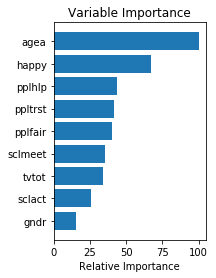

In [107]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()